In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import pandas_datareader as data

In [ ]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 24.7 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
start='2010-01-01'
end='2019-12-31'
df=data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546386
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473096


In [ ]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835609
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221153
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194130
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.616684
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.139946


In [ ]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546386
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430346
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473096


In [ ]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


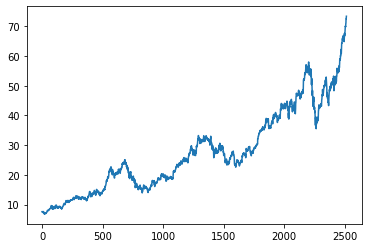

In [ ]:
plt.plot(df.Close)

In [ ]:
df #this is a closed column

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0
...,...,...,...,...,...
2511,71.222504,70.730003,71.172501,71.067497,48478800.0
2512,72.495003,71.175003,71.205002,72.477501,93121200.0
2513,73.492500,72.029999,72.779999,72.449997,146266000.0
2514,73.172501,71.305000,72.364998,72.879997,144114400.0


In [ ]:
#moving averages 

ma100=df.Close.rolling(100).mean()
ma100

#first 100 values are null because it needs previous 100 values to get the moving average 

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
2515    60.331875
Name: Close, Length: 2516, dtype: float64

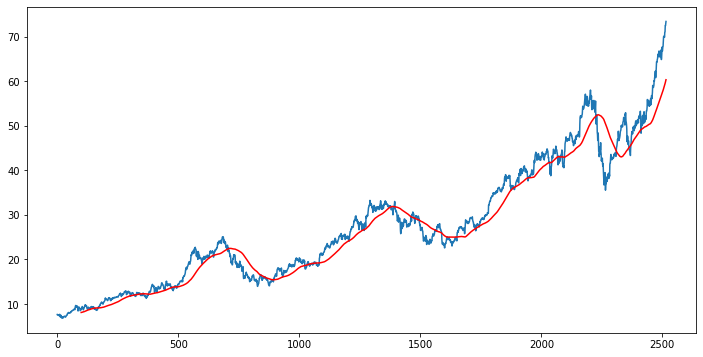

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200
#again, first 200 days will be null

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
2515    54.793137
Name: Close, Length: 2516, dtype: float64

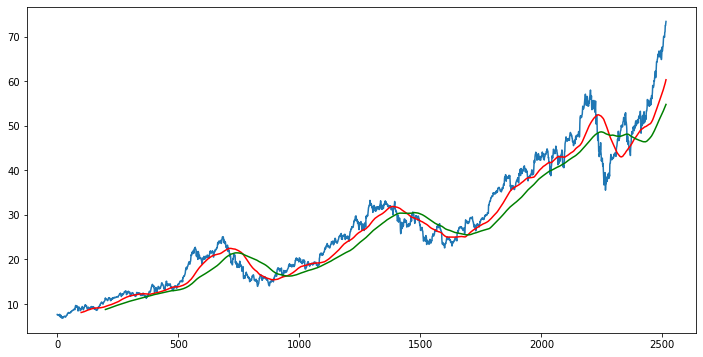

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(2516, 5)

In [ ]:
#splitting out data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

# 70% of data is training data and 30% is testing data

(1761, 1)
(755, 1)


In [ ]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
data_testing.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [ ]:
#scaling down the data 

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
#scaler.fit_transform automatically gives us an array
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.85089656],
       [0.84616011],
       [0.84587593]])

In [ ]:
data_training_array.shape

(1761, 1)

In [ ]:
#  36 33 40 39 38 37 42 44 38 43(x-train)     38(y-train)
# for this model we use 100 steps 

x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train),np.array(y_train)

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
          
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
               
#connect all these layers- dense layer
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 19s 261ms/step - loss: 0.0695
Epoch 2/50
52/52 [==============================] - 15s 295ms/step - loss: 0.0134
Epoch 3/50
52/52 [==============================] - 15s 271ms/step - loss: 0.0131
Epoch 4/50
52/52 [==============================] - 14s 266ms/step - loss: 0.0088
Epoch 5/50
52/52 [==============================] - 14s 262ms/step - loss: 0.0092
Epoch 6/50
52/52 [==============================] - 14s 264ms/step - loss: 0.0083
Epoch 7/50
52/52 [==============================] - 14s 264ms/step - loss: 0.0093
Epoch 8/50
52/52 [==============================] - 14s 267ms/step - loss: 0.0084
Epoch 9/50
52/52 [==============================] - 13s 260ms/step - loss: 0.0075
Epoch 10/50
52/52 [==============================] - 14s 261ms/step - loss: 0.0078
Epoch 11/50
52/52 [==============================] - 14s 263ms/step - loss: 0.0081
Epoch 12/50
52/52 [==============================] - 13s 254ms/step - loss: 0.0071
Epoch 13/50
5

In [ ]:
model.save('keras_model.h5')

In [ ]:
#30% of the data is testing data
data_testing.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_df=past_100_days.append(data_testing,ignore_index=True)

In [ ]:
final_df.head()

,Close
0,27.202499
1,27.000000
2,26.982500
3,27.045000
4,27.370001


In [ ]:
input_data=scaler.fit_transform(final_df)

In [ ]:
input_data.shape

(855, 1)

In [ ]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [ ]:
#convert to arrays

x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [ ]:
#making predictions 
y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

(755, 1)

In [ ]:
y_test

array([0.06660719, 0.06833931, 0.06765694, 0.07075375, 0.07757719,
       0.08324586, 0.08387573, 0.08723495, 0.08461056, 0.08350831,
       0.08854715, 0.08849465, 0.08739241, 0.08854715, 0.08896706,
       0.08838969, 0.09841487, 0.09872982, 0.09878228, 0.09710267,
       0.09563301, 0.13447409, 0.13331935, 0.1362062 , 0.14255719,
       0.14906573, 0.15174258, 0.15373715, 0.15216249, 0.15830357,
       0.16738404, 0.1699559 , 0.16911615, 0.17105818, 0.17620198,
       0.178354  , 0.17530969, 0.17599206, 0.17740917, 0.17772417,
       0.19242073, 0.1880643 , 0.19236827, 0.19005879, 0.19100361,
       0.18827421, 0.18659456, 0.18900904, 0.18932396, 0.18822176,
       0.19593749, 0.19714469, 0.19347055, 0.20118628, 0.19268318,
       0.20097628, 0.19835189, 0.19688223, 0.19814197, 0.21346844,
       0.21514801, 0.21415073, 0.21273361, 0.21294353, 0.21855977,
       0.21462318, 0.21273361, 0.21105396, 0.21016167, 0.20207857,
       0.20297085, 0.19903426, 0.20312831, 0.19982154, 0.19709

In [ ]:
y_predicted

array([[0.09716605],
       [0.09774975],
       [0.09833317],
       [0.0989041 ],
       [0.09945238],
       [0.09997258],
       [0.10046531],
       [0.10093533],
       [0.10139066],
       [0.10183889],
       [0.10228543],
       [0.10273607],
       [0.10319549],
       [0.1036661 ],
       [0.10414842],
       [0.1046415 ],
       [0.10514255],
       [0.10565402],
       [0.10618126],
       [0.10673037],
       [0.10730514],
       [0.1079056 ],
       [0.10855642],
       [0.10929465],
       [0.11016153],
       [0.11119893],
       [0.11244634],
       [0.11393593],
       [0.11568905],
       [0.11771238],
       [0.12000194],
       [0.12254894],
       [0.12533963],
       [0.12834904],
       [0.13154726],
       [0.13490331],
       [0.13838986],
       [0.14197886],
       [0.14564173],
       [0.14934999],
       [0.15307549],
       [0.15679844],
       [0.16049647],
       [0.1641458 ],
       [0.16771966],
       [0.17119558],
       [0.17455271],
       [0.177

In [ ]:
# all values above are scaled down, so we need to scale it up 
scaler.scale_
#this will give the factor by which it was scaled down

array([0.02099517])

In [ ]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

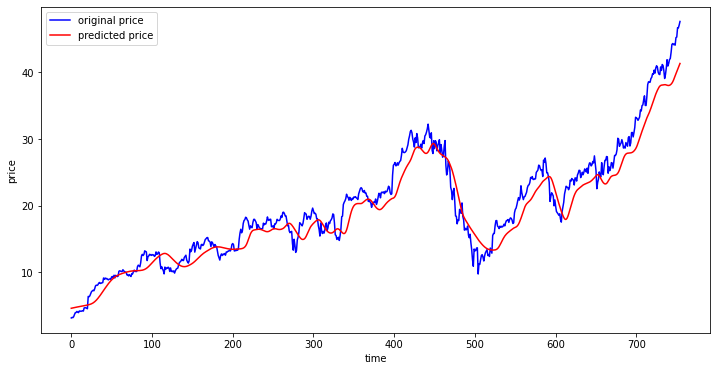

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label="original price")
plt.plot(y_predicted,'r',label="predicted price")
plt.xlabel('time')
plt.ylabel('price')
plt.legend()
plt.show()

In [ ]:
!npm install -g localtunnel

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 1.734s


In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 23.1 MB/s 
     |████████████████████████████████| 181 kB 41.4 MB/s 
     |████████████████████████████████| 4.3 MB 54.1 MB/s 
     |████████████████████████████████| 77 kB 6.0 MB/s 
     |████████████████████████████████| 111 kB 48.0 MB/s 
     |████████████████████████████████| 164 kB 46.6 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 131 kB 59.3 MB/s 
     |████████████████████████████████| 130 kB 59.9 MB/s 
     |████████████████████████████████| 793 kB 46.7 MB/s 
     |████████████████████████████████| 428 kB 35.9 MB/s 
     |████████████████████████████████| 381 kB 56.6 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=2f83da616d99c438eb1b0c6b4c94e410709c6bc4d93fc0fecf68a6c475577bc9
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

2022-05-27 07:50:11.690 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 4.504s
your url is: https://strong-frogs-nail-34-86-153-95.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.86.153.95:8501

2022-05-27 07:50:38.978073: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-27 08:05:46.407 Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi"